In [1]:
"""示例数据
"""
scores = [[1], [1], [2], [2], [3], [3], [3], [4], [4], [5],
          [6], [6], [7], [7], [8], [8], [8], [9], [9], [10]]
passed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Text(0,0.5,'passed')

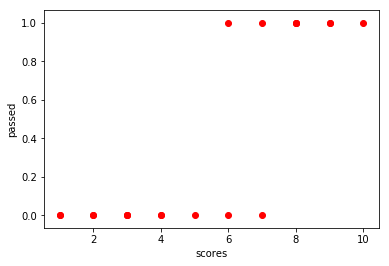

In [2]:
"""示例数据绘图
"""
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(scores, passed, color='r')
plt.xlabel("scores")
plt.ylabel("passed")

In [3]:
"""线性回归拟合
"""
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scores, passed)
model.coef_, model.intercept_

(array([0.1446863]), -0.36683738796414866)

Text(0,0.5,'passed')

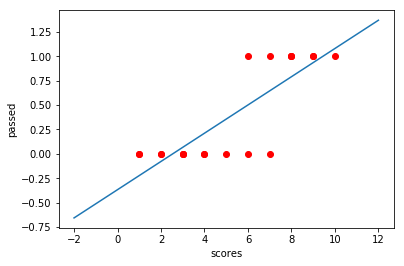

In [4]:
"""拟合后绘图
"""
import numpy as np

x = np.linspace(-2, 12, 100)

plt.plot(x, model.coef_[0] * x + model.intercept_)
plt.scatter(scores, passed, color='r')
plt.xlabel("scores")
plt.ylabel("passed")

Text(0,0.5,'y')

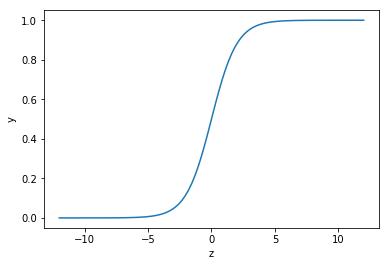

In [5]:
"""Sigmoid 分布函数图像
"""
z = np.linspace(-12, 12, 100)  # 生成等间距 x 值方便绘图
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.xlabel("z")
plt.ylabel("y")

In [6]:
"""逻辑回归模型
"""


def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

In [7]:
"""对数损失函数
"""


def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

In [8]:
"""梯度计算
"""


def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

In [10]:
!wget http:// labfile.oss.aliyuncs.com/courses/1081/course-8-data.csv

http://: Invalid host name.
--2018-09-24 21:18:37--  http://labfile.oss.aliyuncs.com/courses/1081/course-8-data.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1567 (1.5K) [text/csv]
Saving to: 'course-8-data.csv.1'

     0K .                                                     100% 16.7M=0s

2018-09-24 21:18:37 (16.7 MB/s) - 'course-8-data.csv.1' saved [1567/1567]

FINISHED --2018-09-24 21:18:37--
Total wall clock time: 0.8s
Downloaded: 1 files, 1.5K in 0s (16.7 MB/s)


In [11]:
"""加载数据集
"""
import pandas as pd

df = pd.read_csv("course-8-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


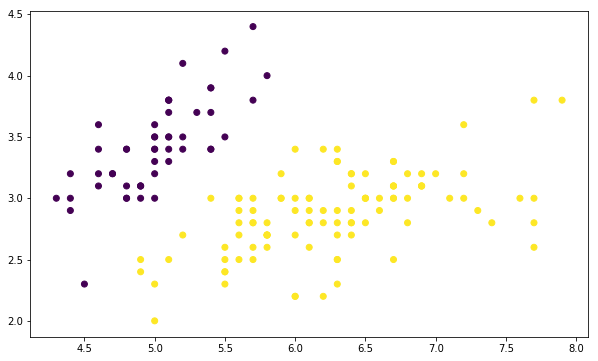

In [12]:
"""绘制数据集
"""
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

In [13]:
"""逻辑回归完整实现
"""

# Sigmoid 分布函数


def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

# 损失函数


def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

# 梯度计算


def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

# 逻辑回归过程


def Logistic_Regression(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        z = np.dot(x, w)  # 更新参数到原线性函数中
        h = sigmoid(z)  # 计算 sigmoid 函数值

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

In [14]:
"""设置参数并训练得到结果
"""
x = df[['X0', 'X1']].values
y = df['Y'].values
lr = 0.001  # 学习率
num_iter = 10000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.3191553759037513, array([-0.17877864,  0.92742771, -1.41234809]))

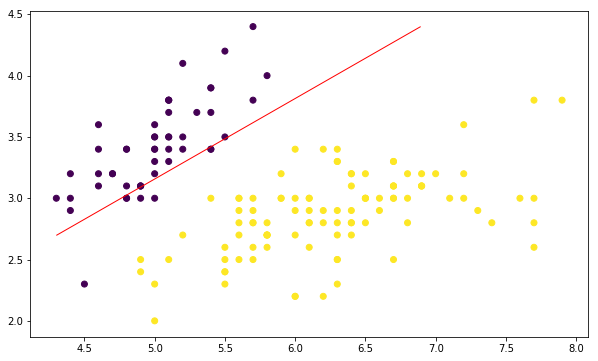

In [15]:
"""将上方得到的结果绘制成图
"""
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max(),
x2_min, x2_max = df['X1'].min(), df['X1'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                       np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red')

Text(0,0.5,'Loss function')

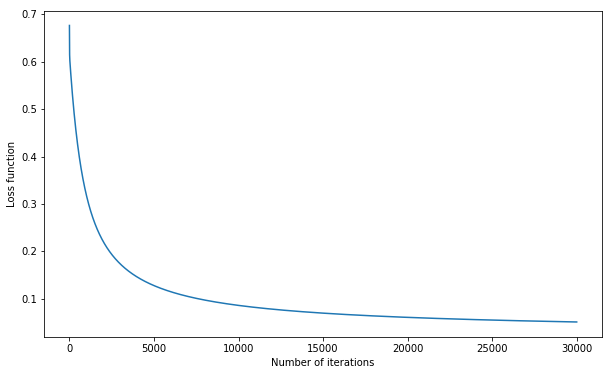

In [16]:
"""绘制损失函数变化曲线
"""


def Logistic_Regression(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        z = np.dot(x, w)  # 更新参数到原线性函数中
        h = sigmoid(z)  # 计算 sigmoid 函数值

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数
l_y = Logistic_Regression(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=0.001, max_iter=10000)  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

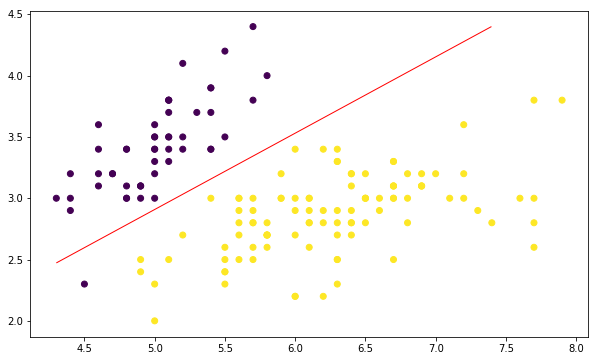

In [18]:
"""将上方得到的结果绘制成图
"""
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max()
x2_min, x2_max = df['X1'].min(), df['X1'].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                       np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red')

In [19]:
model.score(x, y)

0.9933333333333333